In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

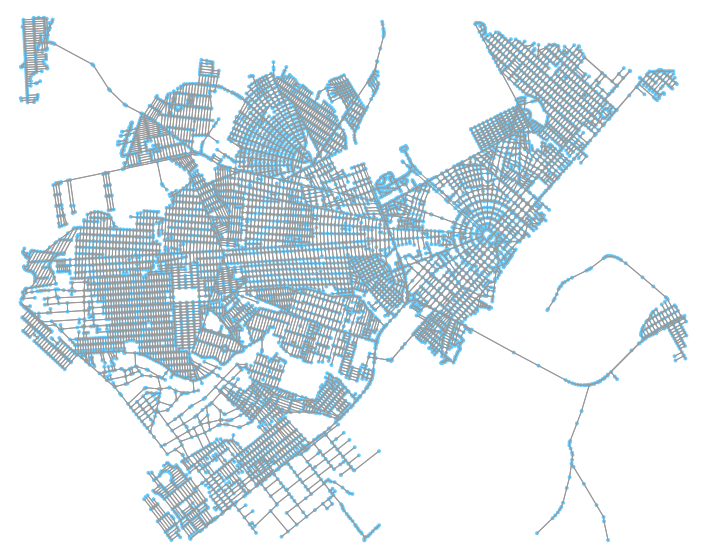

(<Figure size 918.345x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b824f7e80>)

In [4]:
G = ox.graph_from_bbox(2.8765, 2.7503, -60.6267, -60.7805, network_type='drive', simplify=False)
G_projected = ox.project_graph(G)
ox.plot_graph(G, show=True, fig_height=10, save=True, filename='mapaCompleto', file_format='png')

In [5]:
highways_to_keep = ['primary', 'secondary']
H = nx.MultiDiGraph()
for u,v,attr in G.edges(data=True):
    if attr['highway'] in highways_to_keep:
        H.add_edge(u,v,**attr)
        H.node[u].update(G.node[u])
        H.node[v].update(G.node[v])

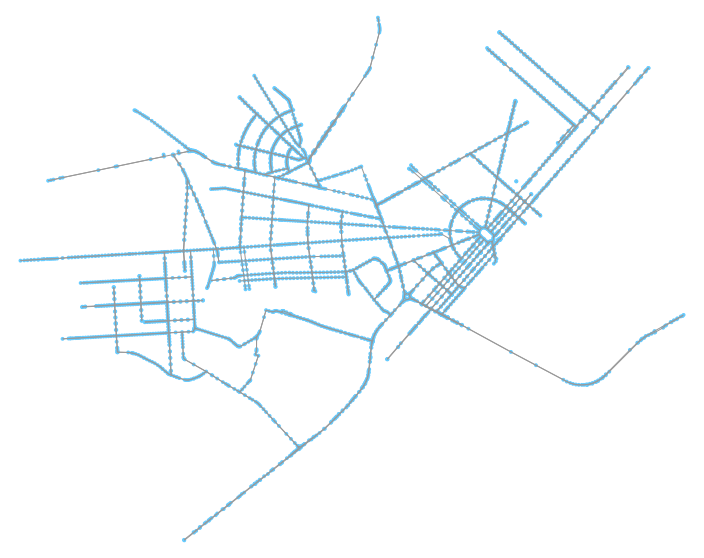

(<Figure size 914.529x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b8d20b630>)

In [6]:
H.graph = G.graph
ox.plot_graph(H, show=True, fig_height=10, save=True, filename='AvPrincSec', file_format='png')

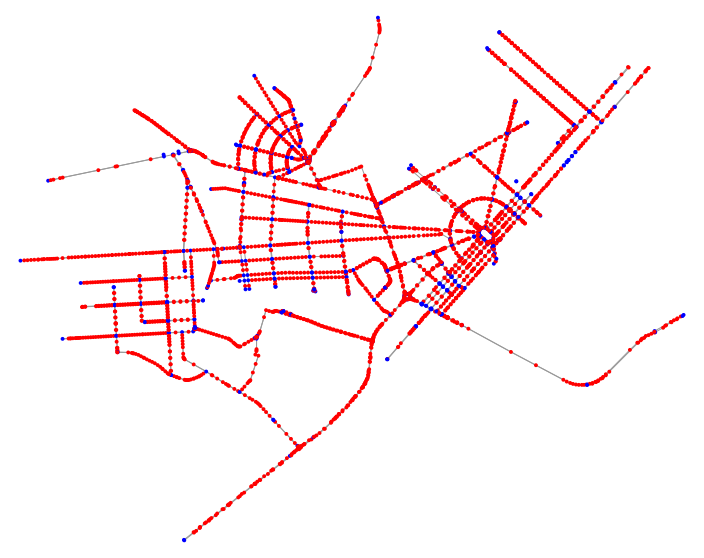

In [9]:
nc = ['b' if ox.is_endpoint(H, node) else 'r' for node in H.nodes()]
fig, ax = ox.plot_graph(H, show=True, fig_height=10, save=True, filename='AvPrincSec', file_format='png', node_color=nc, node_zorder=3)

In [7]:
H = ox.simplify_graph(H)

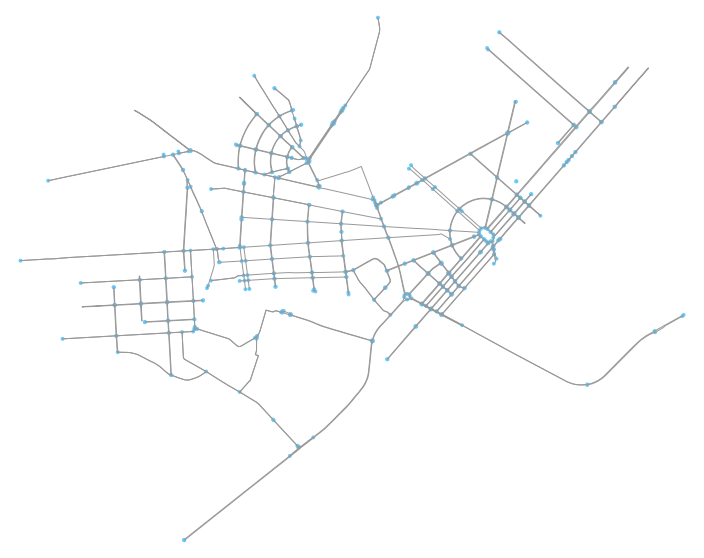

In [11]:
fig, ax = ox.plot_graph(H, show=True, fig_height=10, save=True, filename='grafoSimplf', file_format='png')

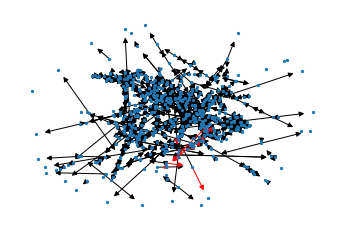

In [80]:
names = ['Avenida Capitão Ene Garcês']
path = [(u, v) for (u, v, attr) in H.edges(data=True) if 'name' in attr and attr['name'] in names]
resto = [(u, v) for (u, v, attr) in H.edges(data=True) if 'name' in attr and attr['name'] not in names]

pos = nx.spring_layout(H)

nx.draw_networkx_nodes(H, pos, node_size=5)

nx.draw_networkx_edges(H, pos, edgelist=resto, width=1)
nx.draw_networkx_edges(H, pos, edgelist=path, width=1, edge_color='r')

plt.axis('off')
plt.show()

In [16]:
names = ['Avenida Ville Roy']
path = [ (u,v) for (u, v, attr) in H.edges(data=True) if 'name' in attr and attr['name'] in names]
path

[(2171726902, 4859779639),
 (1710115594, 1710115567),
 (5859221935, 5318389513),
 (5318389512, 5859221935),
 (5318389513, 1710572011),
 (1067748767, 1673620908),
 (1673620908, 4859779640),
 (1067748837, 1067748767),
 (3589971251, 3182669296),
 (1673620906, 1673620939),
 (1701068573, 1067749069),
 (1673621317, 1673621324),
 (1067749069, 3648084765),
 (1673621324, 1673621388),
 (3182669296, 1673621063),
 (1673621063, 1673620983),
 (4859779640, 3613218742),
 (1673621410, 1710115594),
 (1673620960, 3648084760),
 (1710572011, 1710572374),
 (1710115570, 1710115597),
 (1673621388, 1673621410),
 (1673621413, 1701068573),
 (1710115567, 1710572267),
 (1710115597, 1673621419),
 (1710572267, 1673621553),
 (3648084759, 1673621317),
 (3613218742, 2171726903),
 (4859779639, 1673620903),
 (1673621419, 1673621413),
 (1673621553, 5318389512),
 (2171726899, 2171726902),
 (1673620903, 1673620906),
 (1710572374, 1710115570)]

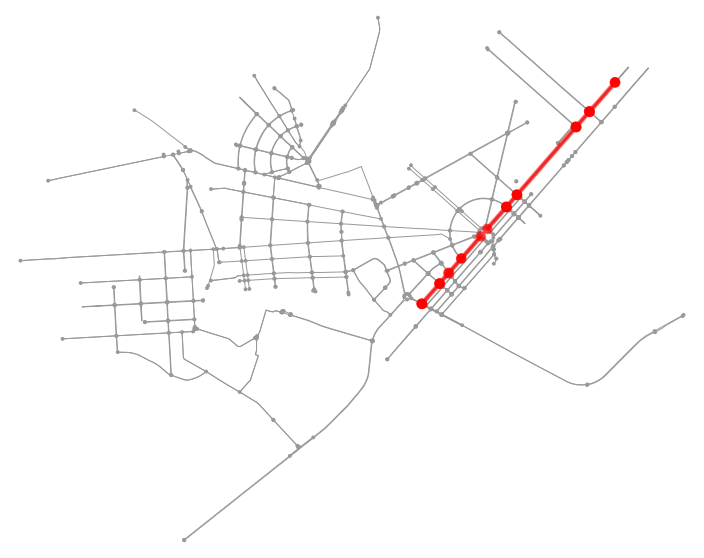

(<Figure size 914.529x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b82bf5278>)

In [17]:
ox.plot.plot_graph_routes(H, path, show=True, fig_height=10)

In [83]:
for u,v in path:
    H.get_edge_data(u, v).values()

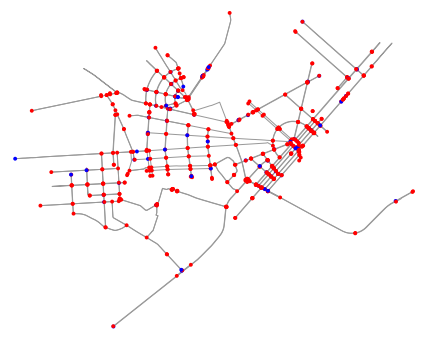

AttributeError: module 'numpy' has no attribute 'rand'

In [84]:
import numpy as np
nb = ['b' if np.random.rand()<.1 else 'r' for node in H.nodes()]
fig, ax = ox.plot_graph(H, node_color=nb, node_zorder=3)

np.rand.random()

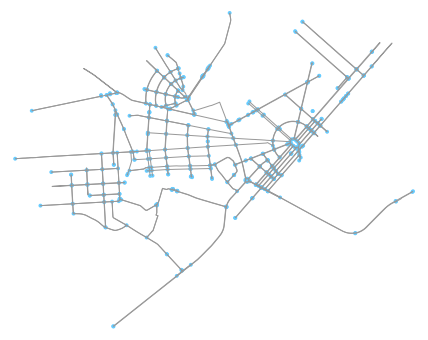

(<Figure size 548.717x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe36ac2af98>)

In [86]:
ox.plot_graph(H)

In [97]:
import geopandas as gpd

gdf_nodes = ox.graph_to_gdfs(ox.project_graph(H), edges=False)
buff = gdf_nodes.buffer(15)
unified = gpd.GeoDataFrame(geometry=list(buff.unary_union))
intersections = unified.centroid

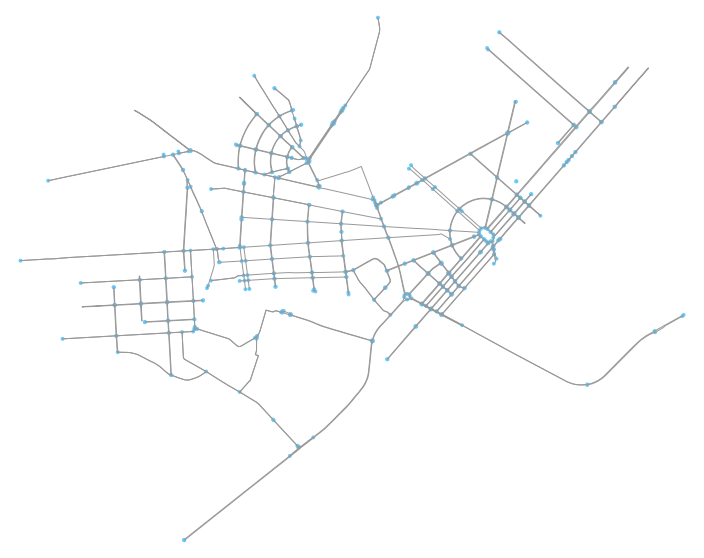

In [98]:
fig, ax = ox.plot_graph(H, fig_height=10, show=True)

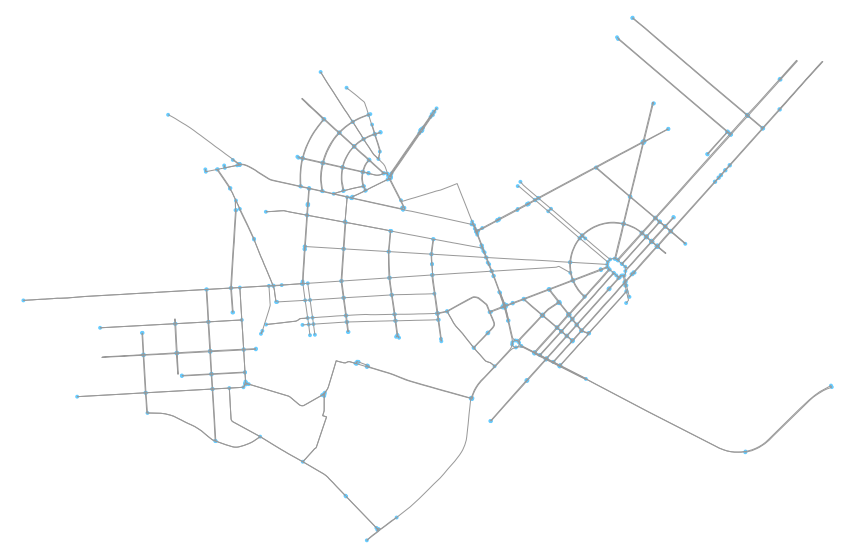

In [3]:
Z = ox.graph_from_bbox(2.8765, 2.7503, -60.6267, -60.7805, network_type='drive', infrastructure='way["highway"~"primary|secondary"]', clean_periphery=True, simplify=True)

Z_proj    = ox.project_graph(Z)
ox.plot_graph(Z_proj, fig_height=10, show=True)
Z_cleaned = ox.clean_intersections(Z_proj, tolerance = 15)

In [117]:
len(H.nodes())

614